In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('campaign_responses.csv')
df.dtypes

customer_id        int64
age                int64
gender            object
annual_income      int64
credit_score       int64
employed          object
marital_status    object
no_of_children     int64
responded         object
dtype: object

In [3]:
df.head()

,customer_id,age,gender,annual_income,credit_score,employed,marital_status,no_of_children,responded
0,1,35,Male,65000,720,Yes,Married,2,Yes
1,2,28,Female,45000,680,No,Single,0,No
2,3,42,Male,85000,750,Yes,Married,3,Yes
3,4,31,Female,55000,710,Yes,Single,1,No
4,5,47,Male,95000,790,Yes,Married,2,Yes


In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df['employed'] = le.fit_transform(df['employed'])
df['marital_status'] = le.fit_transform(df['marital_status'])

df.dtypes

customer_id        int64
age                int64
gender             int32
annual_income      int64
credit_score       int64
employed           int32
marital_status     int32
no_of_children     int64
responded         object
dtype: object

In [8]:
X = df.drop('responded', axis = 1)
y = df['responded']

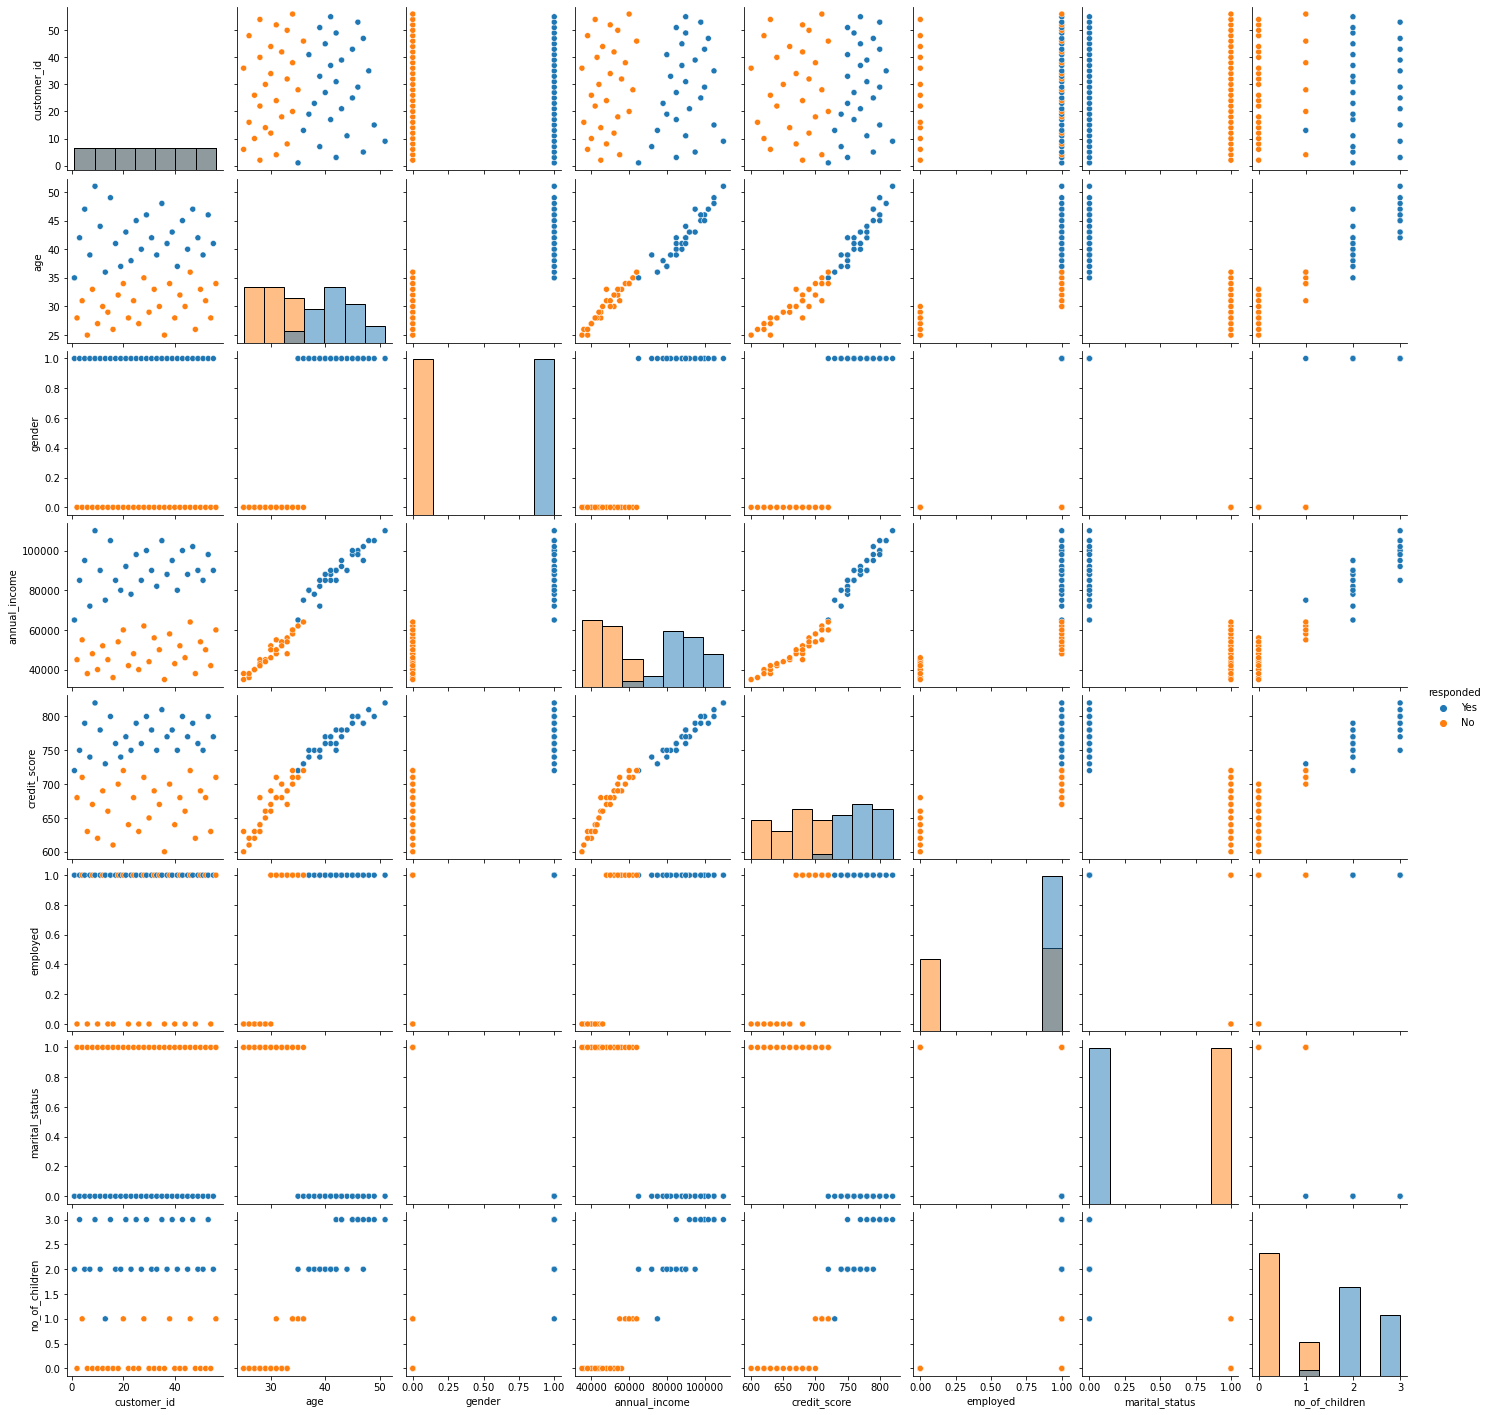

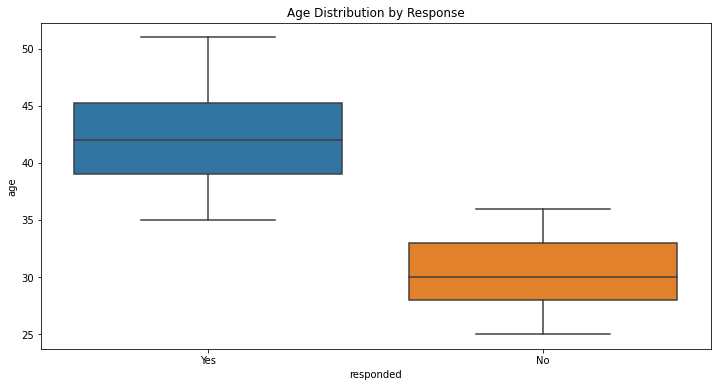

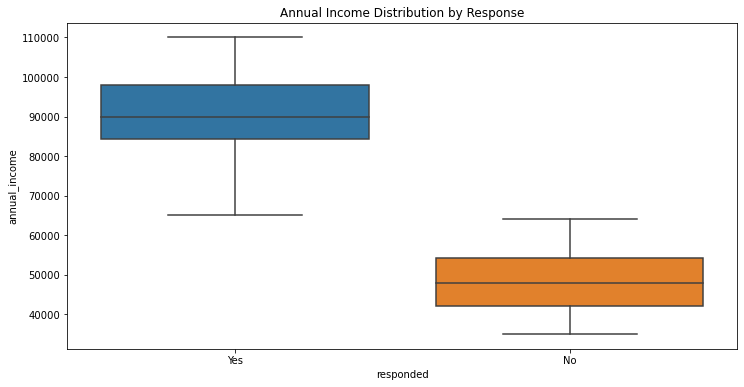

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize relationships between pairs of features and the target variable
sns.pairplot(df, hue='responded', diag_kind='hist')
plt.show()

# Boxplot to visualize the distribution of numerical features for each class
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='responded', y='age')
plt.title('Age Distribution by Response')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='responded', y='annual_income')
plt.title('Annual Income Distribution by Response')
plt.show()

# etc. Repeat for other numerical features



In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 45)

In [11]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', random_state=42)
model.fit(X_train_scaled, y_train)


SVC(random_state=42)

In [26]:
y_pred = model.predict(X_test_scaled)

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)


In [28]:
cm

array([[ 7,  0],
       [ 0, 10]], dtype=int64)

In [29]:
acc

1.0

In [30]:
print(cr)

              precision    recall  f1-score   support

          No       1.00      1.00      1.00         7
         Yes       1.00      1.00      1.00        10

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



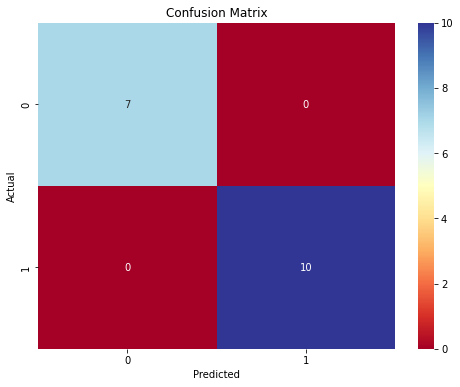

In [31]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='RdYlBu')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()